You should add this link to your google drive. Click the folder. https://drive.google.com/drive/folders/1VVfuBhK-fd2JoPLw9ENgEYiFarwcCFpF?usp=share_link .In the top right, click Add a shortcut to My Drive.

After finishing the hands on, download your notebook and submit it to the following form: https://docs.google.com/forms/d/1mj8ISaPRJcxqFgMb_BG5bbpAHzABG8lFmiM3LYRp4ZY/edit

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np

def get_gradients_xy(img, ksize):
    ## Student Code ~ 2 lines of codes
    #print(img.dtype)
    sobelx = cv2.Sobel(img, cv2.CV_16S, 1,0,ksize=ksize)
    sobely = cv2.Sobel(img, cv2.CV_16S, 0,1,ksize=ksize)
    #
    sobelx = np.absolute(sobelx)
    sobely = np.absolute(sobely)

    sobelx = np.uint8(sobelx)
    sobely = np.uint8(sobely)

    return sobelx, sobely
    ## Student Code Ends


def rescale(img, min,max):
    ## Student Code
    img = (img-img.min())/float(img.max()-img.min())
    img = min + img * (max-min)
    ## End Student Code
    return img

In [3]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

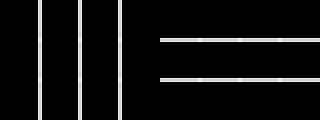

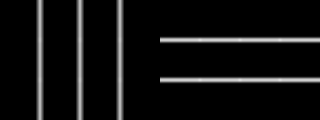

<ipython-input-8-017083fdbae2>:76: RuntimeWarning: overflow encountered in scalar multiply
  [Gx[i, j] **2,Gx[i, j] * Gy[i, j]],
<ipython-input-8-017083fdbae2>:77: RuntimeWarning: overflow encountered in scalar multiply
  [Gx[i, j] *Gy[i, j], Gy[i, j] **2]


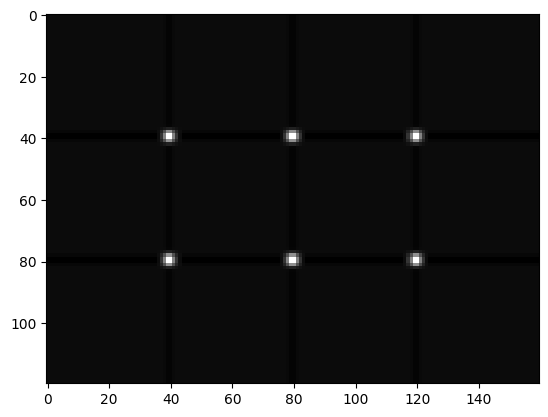

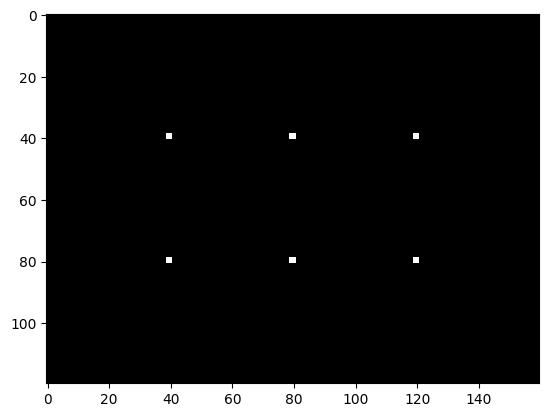

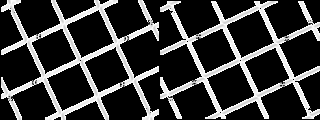

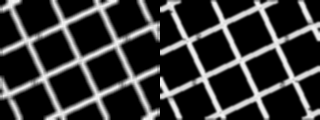

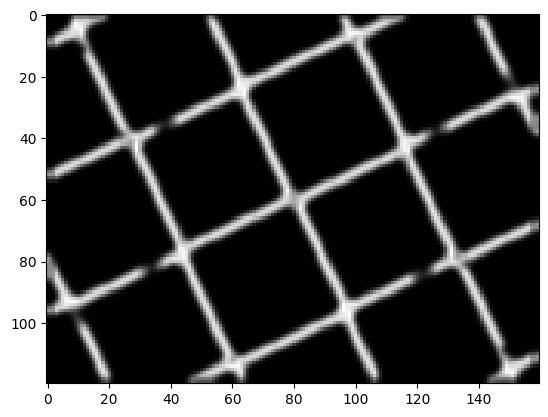

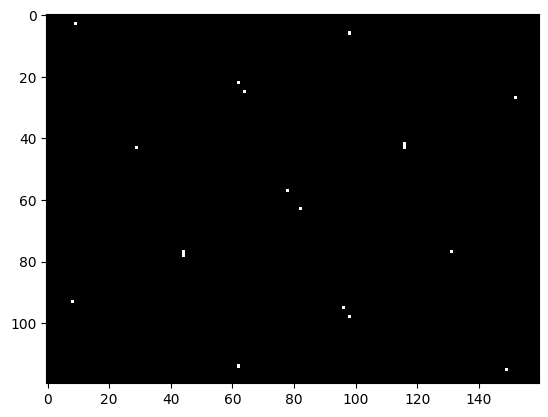

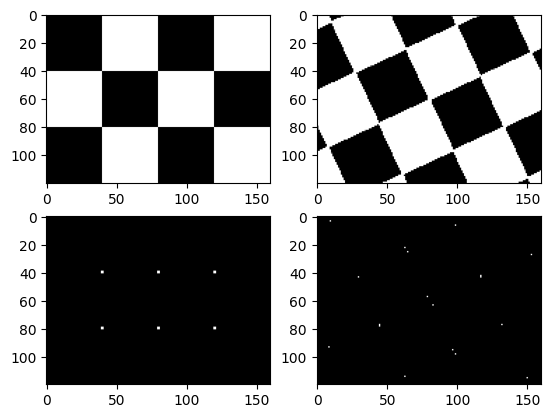

In [8]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC



def NonMaximalSuppression(img, radius):

  h, w = img.shape
  suppressed_img = np.zeros((h, w))

  for i in range(h):
      for j in range(w):
          start_i = max(0, i - radius)
          end_i = min(h - 1, i + radius)
          start_j = max(0, j - radius)
          end_j = min(w - 1, j + radius)

          # Find the maximum value within the window
          maximum = np.max(img[start_i:end_i+1, start_j:end_j+1])
          if img[i, j] == maximum:
              suppressed_img[i, j] = img[i, j]




  """
  consider only the max value
  within window of size(radious x radious)
  around each pixel and assume all other value with 0
  """
  return suppressed_img

"""
1- gradients in both the X and Y directions.
2- smooth the derivative a little using gaussian
> try on TransA, SimA
> save output as  lab4-1-a-1.png, lab4-1-a-1.png
3- Calculate R:
	3.1 Loop on each pixel:
	3.2 Calculate M for each pixel:
		3.2.1 calculate a11=Gx^2, a12=GxGy, a21=GxGy, a22=Gy^2
	3.3 Calculate Det_M = np.linalg.det(a) or Det_M = a11*a22 - a12*a21; and trace=a11+a22
	3.4 Calculate Response at this pixel = det-k*trace^2
	3.5 Display the result, but make sure to re-scale the data in the range 0 to 255
4- Threshold and Non-Maximal Suppression

"""
# 1- gradients in both the X and Y directions.
def harris(img, thresh=200, radius=20, verbose=True):
    Gx, Gy = get_gradients_xy(img, 5)
    if verbose:
        cv2_imshow(np.hstack([Gx, Gy]))

    # 2- smooth the derivative a little using gaussian
    Gx=cv2.GaussianBlur(Gx,(5,5),3,0)
    Gy=cv2.GaussianBlur(Gy,(5,5),0,3)

    #Student Code ~ 2 Lines
    #End Student Code

    cv2_imshow(np.hstack([Gx, Gy]))
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    # 3- Calculate R:
    R = np.zeros(img.shape)
    k = 0.04
    M=np.zeros((2,2))
    # 	3.1 Loop on each pixel:
    for i in range(len(Gx)):
        for j in range(len(Gx[i])):
           M = np.array([
                [Gx[i, j] **2,Gx[i, j] * Gy[i, j]],
                [Gx[i, j] *Gy[i, j], Gy[i, j] **2]
            ])
           Det_M=np.linalg.det(M)
           trace=M[0,0]+M[1,1]
           R[i,j]=Det_M-k*trace**2
    # 	3.2 Calculate M for each pixel:
    # 		    M = [[a11, a12],
    #                [a21, a22]]
    #           with a11=Gx^2, a12=GxGy, a21=GxGy, a22=Gy^2
            #Student Code ~ 1 line of code
            #Student Code


    # 	3.3 Calculate Det_M = np.linalg.det(a) or Det_M = a11*a22 - a12*a21; and trace=a11+a22

    # 	3.4 Calculate Response at this pixel = det-k*trace^2
    #   where trace of M is the sum of its diagonals
            #Student Code ~ 1 line of code
            #End Student Code

    # 4 Display the result, but make sure to re-scale the data in the range 0 to 255

    R = rescale(R, 0, 255)

    plt.imshow(R, cmap="gray")
    plt.show()
    # 5- Threshold and Non-Maximal Suppression
    # Student Code ~ 2 lines of code
    # Threshold for an optimal value, it may vary depending on the image.

    R = NonMaximalSuppression(R, radius)
    R[R>thresh]=255
    R[R<thresh]=0
    # End Student Code
    plt.imshow(R, cmap="gray")
    plt.show()

    return R

img_pairs = [['check.bmp', 'check_rot.bmp']]
dir = "/content/"
i = 0;

for [img1,img2] in img_pairs:
    i += 1
    img1 = cv2.imread('/content/drive/MyDrive/Copy of check.bmp', 0)
    img2 = cv2.imread('/content/drive/MyDrive/Copy of check_rot.bmp', 0)
    r1 = harris(img1)
    r2 = harris(img2) #Note that threshod may need to be different from picture to another
    plt.figure(i)
    plt.subplot(221), plt.imshow(img1, cmap='gray')
    plt.subplot(222), plt.imshow(img2, cmap='gray')
    plt.subplot(223), plt.imshow(r1, cmap='gray')
    plt.subplot(224), plt.imshow(r2, cmap='gray')
    plt.show()